In [0]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import ElasticNet, RANSACRegressor, HuberRegressor, PassiveAggressiveRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn import model_selection
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from pyspark.sql.functions import *

from matplotlib import pyplot as plt
import seaborn as sns

import warnings
from sklearn.exceptions import ConvergenceWarning

In [0]:
query = "SELECT * FROM features"
b = spark.sql(query)
df_b = b.toPandas()
df_b.head()

,Sample Date,Number of Fish,Percent Dead,Percent Total Stressed,Percent Dead or Stressed,Alkalinity (Total as CaCO3),Benzene,Dissolved Aluminum (Al),Dissolved Antimony (Sb),Dissolved Arsenic (As),Dissolved Barium (Ba),Dissolved Cadmium (Cd),Dissolved Calcium (Ca),Dissolved Chloride (Cl),Dissolved Chromium (Cr),Dissolved Cobalt (Co),Dissolved Copper (Cu),Dissolved Iron (Fe),Dissolved Lead (Pb),Dissolved Lithium (Li),Dissolved Magnesium (Mg),Dissolved Manganese (Mn),Dissolved Mercury (Hg),Dissolved Molybdenum (Mo),Dissolved Nickel (Ni),Dissolved Nitrate (N),Dissolved Nitrite (N),Dissolved Organic Carbon (C),Dissolved Phosphorus (P),Dissolved Selenium (Se),Dissolved Silicon (Si),Dissolved Silver (Ag),Dissolved Strontium (Sr),Dissolved Sulphate (SO4),Dissolved Thallium (Tl),Dissolved Thorium (Th),Dissolved Tin (Sn),Dissolved Titanium (Ti),Dissolved Uranium (U),Dissolved Zinc (Zn),...,Total Nickel (Ni),Total Organic Carbon (C),Total Phosphorus (P),Total Potassium (K),Total Selenium (Se),Total Silicon (Si),Total Silver (Ag),Total Sodium (Na),Total Strontium (Sr),Total Sulphur (S),Total Suspended Solids,Total Tin (Sn),Total Titanium (Ti),Total Total Kjeldahl Nitrogen,Total Uranium (U),Total Vanadium (V),Total Zinc (Zn),Xylenes (Total),WW_RET_POND_COD,WW_RET_POND_OG,WW_FLARE_POND_COD,WW_MILLAPI_COD,WW_MILLAPI_OG,CSB_COD,WW_PONDA_OUT_COD,WW_PONDA_OUT_PH,WW_PONDA_OUT_OG,WW_PONDA_OUT_TSS,PONDD_TO_B_COD,PONDD_TO_B_PH,PONDD_TO_B_OG_HEX,PONDD_TO_B_TSS_WATER,P32_32G40_COD,P32_32G40_OG,P32_32G40_TSS,Max Temp (Â°C),Max Temp Flag,Min Temp (Â°C),Min Temp Flag,Mean Temp (Â°C)
0,1/4/2010,10,0.0,0.0,0.0,150,0.0,0.021,0.0005,0.0077,0.07,0.00071,63.0,190.0,0.000,0.0065,0.0010,0.29,0.0,0.07,17.0,0.077,0.003,1.20,0.36,0.120,0.012,8.3,0.100,0.0010,4.3,0.0000,0.47,110.0,0.0,0.001166,0.0,0.000,0.0010,0.009,...,0.58,15.252041,0.200000,4.4,0.0008,7.4,0.0001,130.0,0.50,35.0,37.0,0.0,0.470,1.00,0.0017,3.00,0.015,5.4,117.0,17.60,51,160.0,452.90,200,47.0,7.15,2.20,241,91.387218,7.831353,3.918797,24.203008,50.0,1.1,42,-20.5,0,-27.0,0,-23.8
1,4/19/2010,10,0.0,0.0,0.0,110,0.0,0.160,0.0000,0.0019,0.07,0.77000,53.0,180.0,0.001,0.0062,0.0049,0.27,0.0,0.06,15.0,0.099,0.001,0.48,0.32,0.053,0.006,8.8,0.200,0.0009,2.5,0.0000,0.38,110.0,0.0,0.001166,0.0,0.002,0.0006,0.014,...,0.36,15.252041,0.200000,3.8,0.0007,2.6,0.0000,120.0,0.37,36.0,12.0,0.0,0.021,0.95,0.0007,1.10,0.013,0.0,89.0,15.36,51,160.0,19.94,200,66.0,7.15,8.31,26,91.387218,7.831353,3.918797,24.203008,41.0,1.2,16,22.2,0,6.3,0,14.3
2,5/17/2010,10,0.0,0.0,0.0,100,0.6,0.033,0.0000,0.0070,0.08,0.17000,220.0,170.0,0.000,0.0060,0.0000,0.00,0.0,0.07,43.0,0.220,0.000,2.00,0.30,0.730,0.020,11.0,0.099,0.0020,2.1,0.0013,0.59,560.0,0.0,0.001166,0.0,0.000,0.0029,0.030,...,0.31,15.252041,0.150000,4.0,0.0020,2.9,0.0099,90.0,0.58,190.0,14.0,0.0,0.024,1.10,0.0014,2.20,0.020,3.2,210.0,44.70,51,470.0,13.30,200,125.0,7.61,4.10,43,91.387218,7.831353,3.918797,24.203008,54.0,1.4,17,25.1,0,11.9,0,18.5
3,6/14/2010,10,0.0,0.0,0.0,97,0.0,0.041,0.0004,0.0031,0.07,0.51000,99.0,170.0,0.000,0.0045,0.0016,0.15,0.0,0.04,13.0,0.120,0.003,1.00,0.22,0.024,0.000,13.0,0.046,0.0008,2.4,0.0000,0.37,190.0,0.0,0.001166,0.0,0.000,0.0007,0.000,...,0.26,15.252041,0.120000,2.6,0.0005,2.6,0.0000,94.0,0.38,68.0,11.0,0.0,0.019,1.10,0.0007,1.40,0.016,0.0,88.0,19.80,51,111.0,16.10,200,90.0,7.61,6.40,28,91.387218,7.831353,3.918797,24.203008,65.0,1.9,11,21.4,0,10.0,0,15.7
4,8/16/2010,10,0.0,0.0,0.0,100,0.0,0.052,0.0005,0.0039,0.07,0.63000,56.0,130.0,0.000,0.0050,0.0011,0.00,0.0,0.06,13.0,0.072,0.000,0.70,0.24,0.000,0.000,5.2,0.065,0.0007,2.0,0.0000,0.36,85.0,0.0,0.001166,0.0,0.000,0.0007,0.008,...,0.29,15.252041,0.327994,2.2,0.0005,2.3,0.0000,74.0,0.38,27.0,11.0,0.0,0.031,0.47,0.0009,0.98,0.011,0.0,65.0,18.50,51,111.0,24.20,200,42.0,7.61,4.00,20,91.387218,7.831353,3.918797,24.203008,18.0,0.8,11,16.2,0,7.5,0,11.9


In [0]:
df_b['Sample Date'] = pd.to_datetime(df_b['Sample Date'])
df_b.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 121 columns):
Sample Date datetime64[ns]
Number of Fish int32
Percent Dead float64
Percent Total Stressed float64
Percent Dead or Stressed float64
Alkalinity (Total as CaCO3) int32
Benzene float64
Dissolved Aluminum (Al) float64
Dissolved Antimony (Sb) float64
Dissolved Arsenic (As) float64
Dissolved Barium (Ba) float64
Dissolved Cadmium (Cd) float64
Dissolved Calcium (Ca) float64
Dissolved Chloride (Cl) float64
Dissolved Chromium (Cr) float64
Dissolved Cobalt (Co) float64
Dissolved Copper (Cu) float64
Dissolved Iron (Fe) float64
Dissolved Lead (Pb) float64
Dissolved Lithium (Li) float64
Dissolved Magnesium (Mg) float64
Dissolved Manganese (Mn) float64
Dissolved Mercury (Hg) float64
Dissolved Molybdenum (Mo) float64
Dissolved Nickel (Ni) float64
Dissolved Nitrate (N) float64
Dissolved Nitrite (N) float64
Dissolved Organic Carbon (C) float64
Dissolved Phosphorus (P) float64
Dissolved Selenium (Se) float64
Dissolved Silicon (Si) float64
Dissolved Silver (Ag) float64
Dissolved Strontium (Sr) float64
Dissolved Sulphate (SO4) float64
Dissolved Thallium (Tl) float64
Dissolved Thorium (Th) float64
Dissolved Tin (Sn) float64
Dissolved Titanium (Ti) float64
Dissolved Uranium (U) float64
Dissolved Zinc (Zn) float64
Ethylbenzene float64
F1 (C6-C10) - BTEX float64
F2 (C10-C16 Hydrocarbons) float64
F3 (C16-C34 Hydrocarbons) float64
F4 (C34-C50 Hydrocarbons) float64
Hardness (CaCO3) int32
Hydrogen Sulphide (H2S) float64
Hydroxide (OH) int32
Indeno(1_2_3-cd)pyrene float64
Naphthalene float64
Naphthenic Acids float64
Nitrate plus Nitrite (N) float64
Oil and grease float64
pH float64
Phenanthrene float64
Phenols float64
Pyrene float64
Quinoline float64
Toluene float64
Total Aluminum (Al) float64
Total Ammonia (N) float64
Total Antimony (Sb) float64
Total Arsenic (As) float64
Total Barium (Ba) float64
Total Beryllium (Be) float64
Total Bismuth (Bi) float64
Total Boron (B) float64
Total Cadmium (Cd) float64
Total Calcium (Ca) float64
Total Chemical Oxygen Demand float64
Total Chromium (Cr) float64
Total Cobalt (Co) float64
Total Copper (Cu) float64
Total Dissolved Solids int32
Total Iron (Fe) float64
Total Lead (Pb) float64
Total Lithium (Li) float64
Total Magnesium (Mg) float64
Total Manganese (Mn) float64
Total Mercury (Hg) float64
Total Molybdenum (Mo) float64
Total Nickel (Ni) float64
Total Organic Carbon (C) float64
Total Phosphorus (P) float64
Total Potassium (K) float64
Total Selenium (Se) float64
Total Silicon (Si) float64
Total Silver (Ag) float64
Total Sodium (Na) float64
Total Strontium (Sr) float64
Total Sulphur (S) float64
Total Suspended Solids float64
Total Tin (Sn) float64
Total Titanium (Ti) float64
Total Total Kjeldahl Nitrogen float64
Total Uranium (U) float64
Total Vanadium (V) float64
Total Zinc (Zn) float64
Xylenes (Total) float64
WW_RET_POND_COD float64
WW_RET_POND_OG float64
WW_FLARE_POND_COD int32
WW_MILLAPI_COD float64
WW_MILLAPI_OG float64
CSB_COD int32
WW_PONDA_OUT_COD float64
WW_PONDA_OUT_PH float64
WW_PONDA_OUT_OG float64
WW_PONDA_OUT_TSS int32
PONDD_TO_B_COD float64
PONDD_TO_B_PH float64
PONDD_TO_B_OG_HEX float64
PONDD_TO_B_TSS_WATER float64
P32_32G40_COD float64
P32_32G40_OG float64
P32_32G40_TSS int32
Max Temp (Â°C) float64
Max Temp Flag int32
Min Temp (Â°C) float64
Min Temp Flag int32
Mean Temp (Â°C) float64
dtypes: datetime64[ns](1), float64(109), int32(11)
memory usage: 147.2 KB

In [0]:
y = df_b['Percent Dead']
cols_to_remove = ['Number of Fish', 'Percent Dead', 'Percent Total Stressed ', 'Percent Dead or Stressed', 'Sample Date']
X = df_b.drop(cols_to_remove, axis=1)

In [0]:
warnings.filterwarnings('ignore', category=ConvergenceWarning)
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
# prepare configuration for cross validation test harness
seed = 42
# Test fit using {learner}
dict = {'GradientBoostingRegressor':'GBR', 'RandomForestRegressor':'RFR', 
                'ElasticNet':'EN', 'HuberRegressor':'HR', 'PassiveAggressiveRegressor':'PAR',
                'KNeighborsRegressor':'KNN', 'SVR':'SVR', 'LinearSVR':'LSVR',
                'RANSACRegressor':'RANSACR', 'MLPRegressor':'MLP'}

for learner in [GradientBoostingRegressor, RandomForestRegressor, MLPRegressor,
                ElasticNet, HuberRegressor, PassiveAggressiveRegressor,
                KNeighborsRegressor, SVR, LinearSVR]:  #RANSACRegressor 
      kfold = model_selection.KFold(n_splits=7, random_state=seed)
      learner = learner()
      learner_name = str(learner).split("(", maxsplit=1)[0]
      #cv_results = model_selection.cross_val_score(learner, X, y, cv=kfold, scoring=scoring)
      cv_results = model_selection.cross_val_score(learner, X, y, cv=kfold, scoring='r2')
      results.append(cv_results)
      names.append(learner_name)
      msg = "%s: %f (%f)" % (learner_name, cv_results.mean(), cv_results.std())
      print(msg)


GradientBoostingRegressor: -0.989577 (1.260403)
/databricks/python/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
 "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/databricks/python/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
 "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/databricks/python/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
 "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/databricks/python/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
 "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/databricks/python/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
 "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/databricks/python/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
 "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/databricks/python/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
 "10 in version 0.20 to 100 in 0.22.", FutureWarning)
RandomForestRegressor: -0.955298 (0.790596)
MLPRegressor: -16242.198197 (29745.011380)
ElasticNet: -0.206388 (0.409463)
HuberRegressor: -29.469651 (62.429658)
/databricks/python/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
 FutureWarning)
/databricks/python/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
 FutureWarning)
/databricks/python/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
 FutureWarning)
/databricks/python/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
 FutureWarning)
/databricks/python/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
 FutureWarning)
/databricks/python/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters h

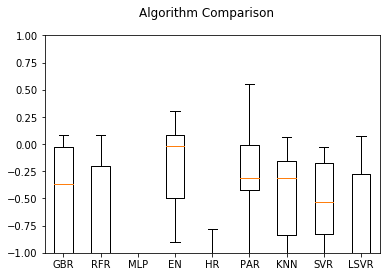

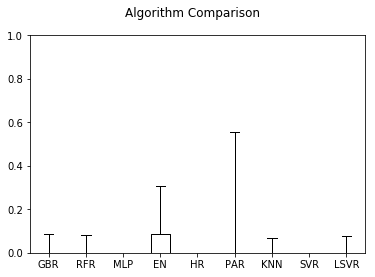

In [0]:
# boxplot for algorith comparison
axis_names = []
for item in names:
  print(dict[item])
  axis_names.append(dict[item])
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(axis_names)
ax.set_ylim(-1,1)
plt.show()
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(axis_names)
ax.set_ylim(0,1)
plt.show()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)  
# Scale dataset
scaler = preprocessing.StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)
y_train_scale = y_train 
y_test_scale = y_test

/databricks/python/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
 return self.partial_fit(X, y)
/databricks/python/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
 return self.fit(X, **fit_params).transform(X)
/local_disk0/tmp/1606429176302-0/PythonShell.py:5: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
 import linecache

In [0]:
CC = [1e-7, 1e-6, 5e-6, 0.00001, .0005, .01, .05, 0.1, .5, 1]
r2 = -np.inf
for c in CC:
  regr = PassiveAggressiveRegressor(C=c, max_iter=1000, random_state=42, tol=1e-3)
  regr.fit(X_train_scale, y_train_scale)
  y_pred = regr.predict(X_test_scale)
  if r2_score(y_test_scale, y_pred) > r2:
      c_best = c
      r2 = r2_score(y_test_scale, y_pred)
regr = PassiveAggressiveRegressor(C = c_best, max_iter=1000, random_state=0, tol=1e-3)
regr.fit(X_train_scale, y_train_scale)
y_pred = regr.predict(X_test_scale)
r2 = r2_score(y_test_scale, y_pred)
print(c_best)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test_scale, y_pred))
print('Variance score: %.2f' % r2_score(y_test_scale, y_pred))

5e-06
Mean squared error: 0.12
Variance score: -0.30

##Doing the same with feature selection

In [0]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop
def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [0]:
print('Top Correlated Pairs:')
print(get_top_abs_correlations(X, n=20))

Top Correlated Pairs:
Dissolved Thallium (Tl) Total Beryllium (Be) 1.000000
Dissolved Silver (Ag) Total Silver (Ag) 0.998302
Dissolved Molybdenum (Mo) Total Molybdenum (Mo) 0.995189
Max Temp (Â°C) Mean Temp (Â°C) 0.979688
Dissolved Sulphate (SO4) Total Sulphur (S) 0.978240
Min Temp (Â°C) Mean Temp (Â°C) 0.976821
Total Cobalt (Co) Total Nickel (Ni) 0.975542
Hardness (CaCO3) Total Calcium (Ca) 0.972764
Dissolved Cobalt (Co) Dissolved Nickel (Ni) 0.971808
Dissolved Nickel (Ni) Total Nickel (Ni) 0.966692
Dissolved Selenium (Se) Total Selenium (Se) 0.963852
Dissolved Cadmium (Cd) Total Cadmium (Cd) 0.945956
Dissolved Strontium (Sr) Total Strontium (Sr) 0.945524
Dissolved Lithium (Li) Total Lithium (Li) 0.942816
Dissolved Chromium (Cr) Dissolved Tin (Sn) 0.941086
Dissolved Nickel (Ni) Total Cobalt (Co) 0.934968
Dissolved Cobalt (Co) Total Nickel (Ni) 0.932049
Hardness (CaCO3) Total Magnesium (Mg) 0.932041
Total Lead (Pb) Total Titanium (Ti) 0.931733
Dissolved Cobalt (Co) Total Cobalt (Co) 0.931413
dtype: float64

In [0]:
# Removing features with 0.97 & above correlation
# keeping the ones with 1) higher count 2) higher std 3) keeping total instead of dissolved
list_to_remove = ['Dissolved Thallium (Tl)', 'Dissolved Silver (Ag)', 'Dissolved Molybdenum (Mo)', \
                 'Dissolved Sulphate (SO4)', 'Max Temp (Â°C)', 'Min Temp (Â°C)', 'Hardness (CaCO3)', \
                 'Total Nickel (Ni)', 'Dissolved Cobalt (Co)'\
                 ]
df = X.copy()
df.drop(list_to_remove, axis=1, inplace=True)
df.shape

Out[8]: (163, 107)

In [0]:
# Scaling features to [0,1]
def scaling(df, str=['Time']):
  """ gets a dataframe (df) and a column name(Time/Date) and normalize all columns except col named str"""
  list0 = df.columns.difference(str)
  df_norm = df.copy()
  for col in list0:
    df_norm[col] = (df_norm[col]-df_norm[col].min())/(df_norm[col].max()-df_norm[col].min()) 
  return df_norm

def variance_calc(df, str=['Time']):
    list0 = df.columns.difference(str)
    NN = len(list0)
    var_mat = pd.DataFrame(np.zeros([NN, 2]))
    counter = 0
    for col in list0:
      # calculating variance of (normalized) features
      var_mat[0][counter] = col
      var_mat[1][counter] = df_norm[col].var()
      counter +=1
    var_mat.columns = ['feature', 'vari']
    return var_mat

In [0]:
# no variance in the sollfowing features
df.drop(['Hydroxide (OH)', 'CSB_COD', 'Max Temp Flag', 'Min Temp Flag', 'WW_FLARE_POND_COD'], axis=1, inplace=True)

In [0]:
df_norm = scaling(df, str=[])
varm = variance_calc(df_norm, str=[])
# Showing features with low variance
varm.sort_values(by='vari').head(20)

,feature,vari
81,Total Silver (Ag),0.006146
15,Dissolved Manganese (Mn),0.006196
84,Total Sulphur (S),0.006535
67,Total Copper (Cu),0.006705
30,Ethylbenzene,0.006877
74,Total Mercury (Hg),0.007262
7,Dissolved Calcium (Ca),0.007623
86,Total Tin (Sn),0.007994
63,Total Calcium (Ca),0.008046
95,WW_PONDA_OUT_OG,0.008108


In [0]:
# Selecting features with lowest variance
var_threshold = 0.01
low_var_features = varm.feature[varm.vari < var_threshold]
df_norm.drop(low_var_features, axis=1, inplace=True)
df_norm.shape

Out[12]: (163, 84)

In [0]:
list00 = df_norm.columns

In [0]:
seed = np.random.seed(42)
selector = SelectKBest(mutual_info_regression, k=30)
df_new = selector.fit_transform(df_norm, y)
selected_features = df_norm.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
selected_features

Out[14]: array(['Dissolved Aluminum (Al)', 'Dissolved Barium (Ba)',
 'Dissolved Cadmium (Cd)', 'Dissolved Chloride (Cl)',
 'Dissolved Chromium (Cr)', 'Dissolved Phosphorus (P)',
 'Dissolved Silicon (Si)', 'Dissolved Thorium (Th)',
 'Dissolved Uranium (U)', 'Indeno(1_2_3-cd)pyrene',
 'Oil and grease', 'Phenanthrene', 'Quinoline',
 'Total Aluminum (Al)', 'Total Ammonia (N)', 'Total Cadmium (Cd)',
 'Total Manganese (Mn)', 'Total Molybdenum (Mo)',
 'Total Silicon (Si)', 'Total Strontium (Sr)',
 'Total Suspended Solids', 'Total Total Kjeldahl Nitrogen',
 'Total Uranium (U)', 'Total Vanadium (V)', 'Xylenes (Total)',
 'WW_MILLAPI_OG', 'WW_PONDA_OUT_COD', 'P32_32G40_COD',
 'P32_32G40_OG', 'Mean Temp (Â°C)'], dtype=object)

In [0]:
# Removed features at this stage
list00.difference(selected_features)

Out[14]: Index(['Alkalinity (Total as CaCO3)', 'Benzene', 'Dissolved Antimony (Sb)',
 'Dissolved Arsenic (As)', 'Dissolved Cadmium (Cd)',
 'Dissolved Chromium (Cr)', 'Dissolved Copper (Cu)',
 'Dissolved Lithium (Li)', 'Dissolved Magnesium (Mg)',
 'Dissolved Nickel (Ni)', 'Dissolved Nitrate (N)',
 'Dissolved Nitrite (N)', 'Dissolved Organic Carbon (C)',
 'Dissolved Strontium (Sr)', 'Dissolved Thorium (Th)',
 'Dissolved Titanium (Ti)', 'Dissolved Zinc (Zn)', 'F1 (C6-C10) - BTEX',
 'Hydrogen Sulphide (H2S)', 'Indeno(1_2_3-cd)pyrene',
 'Nitrate plus Nitrite (N)', 'PONDD_TO_B_COD', 'PONDD_TO_B_PH',
 'PONDD_TO_B_TSS_WATER', 'Phenanthrene', 'Phenols', 'Toluene',
 'Total Aluminum (Al)', 'Total Antimony (Sb)', 'Total Arsenic (As)',
 'Total Barium (Ba)', 'Total Beryllium (Be)', 'Total Boron (B)',
 'Total Chemical Oxygen Demand', 'Total Cobalt (Co)', 'Total Iron (Fe)',
 'Total Lead (Pb)', 'Total Lithium (Li)', 'Total Magnesium (Mg)',
 'Total Molybdenum (Mo)', 'Total Organic Carbon (C)',
 'Total Phosphorus (P)', 'Total Potassium (K)', 'Total Silicon (Si)',
 'Total Sodium (Na)', 'Total Suspended Solids', 'Total Titanium (Ti)',
 'Total Zinc (Zn)', 'WW_MILLAPI_COD', 'WW_PONDA_OUT_PH',
 'WW_PONDA_OUT_TSS', 'WW_RET_POND_COD', 'WW_RET_POND_OG', 'pH'],
 dtype='object')

In [0]:
X_selected = df[selected_features]

In [0]:
warnings.filterwarnings('ignore', category=ConvergenceWarning)
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
# prepare configuration for cross validation test harness
seed = 42
# Test fit using {learner}
dict = {'GradientBoostingRegressor':'GBR', 'RandomForestRegressor':'RFR', 
                'ElasticNet':'EN', 'HuberRegressor':'HR', 'PassiveAggressiveRegressor':'PAR',
                'KNeighborsRegressor':'KNN', 'SVR':'SVR', 'LinearSVR':'LSVR',
                'RANSACRegressor':'RANSACR', 'MLPRegressor':'MLP'}

for learner in [GradientBoostingRegressor, RandomForestRegressor, MLPRegressor,
                ElasticNet, HuberRegressor, PassiveAggressiveRegressor,
                KNeighborsRegressor, SVR, LinearSVR]:  #RANSACRegressor 
      kfold = model_selection.KFold(n_splits=7, random_state=seed)
      learner = learner()
      learner_name = str(learner).split("(", maxsplit=1)[0]
      #cv_results = model_selection.cross_val_score(learner, X, y, cv=kfold, scoring=scoring)
      cv_results = model_selection.cross_val_score(learner, X_selected, y, cv=kfold, scoring='r2')
      results.append(cv_results)
      names.append(learner_name)
      msg = "%s: %f (%f)" % (learner_name, cv_results.mean(), cv_results.std())
      print(msg)

GradientBoostingRegressor: -1.056175 (1.304936)
/databricks/python/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
 "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/databricks/python/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
 "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/databricks/python/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
 "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/databricks/python/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
 "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/databricks/python/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
 "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/databricks/python/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
 "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/databricks/python/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
 "10 in version 0.20 to 100 in 0.22.", FutureWarning)
RandomForestRegressor: -0.669933 (1.240548)
MLPRegressor: -4577.043860 (10733.901969)
ElasticNet: -0.028323 (0.403338)
HuberRegressor: -0.094784 (0.409903)
/databricks/python/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
 FutureWarning)
/databricks/python/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
 FutureWarning)
/databricks/python/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
 FutureWarning)
/databricks/python/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
 FutureWarning)
/databricks/python/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
 FutureWarning)
/databricks/python/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have

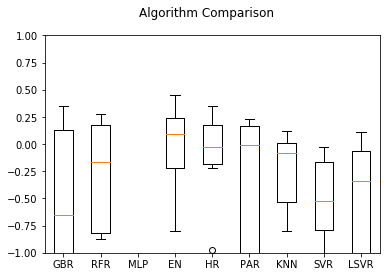

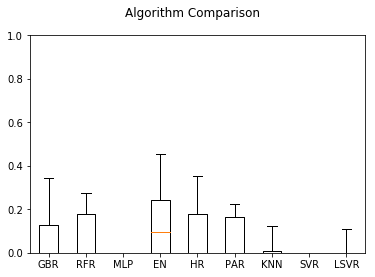

In [0]:
# boxplot for algorith comparison
axis_names = []
for item in names:
  print(dict[item])
  axis_names.append(dict[item])
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(axis_names)
ax.set_ylim(-1,1)
plt.show()
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(axis_names)
ax.set_ylim(0,1)
plt.show()

##ElasticNet with top 30 features

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.20, random_state=42)  
# Scale dataset
scaler = preprocessing.StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)
y_train_scale = y_train 
y_test_scale = y_test

In [0]:
alpha = [1e-7, 1e-6, 5e-6, 0.00001, .0005, .01, .04, .05, 0.07, 0.1, .5, 1]
l1_ratio = [0.1, .15, 0.2, .25, .3, .4, 0.5, .6, .8, .9]
r2 = -np.inf
for a in alpha:
  for l in l1_ratio:
    regr = ElasticNet(alpha=a, l1_ratio=l, random_state=42)
    regr.fit(X_train_scale, y_train_scale)
    y_pred = regr.predict(X_test_scale)
    if r2_score(y_test_scale, y_pred) > r2:
        a_best = a
        l_best = l
        r2 = r2_score(y_test_scale, y_pred)
regr = ElasticNet(alpha=a_best, l1_ratio=l_best, random_state=42)
regr.fit(X_train_scale, y_train_scale)
y_pred = regr.predict(X_test_scale)
r2 = r2_score(y_test_scale, y_pred)
print(a_best, l_best)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test_scale, y_pred))
print('Variance score: %.2f' % r2_score(y_test_scale, y_pred))

0.04 0.2
Mean squared error: 0.05
Variance score: 0.61

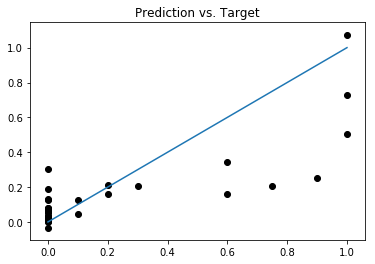

In [0]:
plt.scatter(y_test_scale,  y_pred, color='black')
sns.lineplot([0, 1],[0, 1])
plt.title('Prediction vs. Target')
plt.show()

## Optimum No. of Features for ElasticNet

In [0]:
nn_list = []
r2_list = []
features_list = []
for nn in range(5,30):
  # selecting top nn features
  seed = np.random.seed(42)
  selector = SelectKBest(mutual_info_regression, k=nn)
  df_new = selector.fit_transform(df_norm, y)
  selected_featuresnn = df_norm.columns.values[selector.get_support()]
  #scores = selector.scores_[selector.get_support()]
  X_selected = df[selected_featuresnn]
  X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.20, random_state=42)  
  # Scale dataset
  scaler = preprocessing.StandardScaler()
  X_train_scale = scaler.fit_transform(X_train)
  X_test_scale = scaler.transform(X_test)
  y_train_scale = y_train 
  y_test_scale = y_test
  
  alpha = [1e-7, 1e-6, 5e-6, 0.00001, .0005, .01, .04, .05, 0.09, 0.1, .25, .5, 1]
  l1_ratio = [.05, 0.1, .12, 0.2, .25, .3, .4, 0.5, .6, .8, .9]
  r2 = -np.inf
  for a in alpha:
    for l in l1_ratio:
      regr = ElasticNet(alpha=a, l1_ratio=l, random_state=42)
      regr.fit(X_train_scale, y_train_scale)
      y_pred = regr.predict(X_test_scale)
      if r2_score(y_test_scale, y_pred) > r2:
        a_best = a
        l_best = l
        r2 = r2_score(y_test_scale, y_pred)
  regr = ElasticNet(alpha=a_best, l1_ratio=l_best, random_state=42)
  regr.fit(X_train_scale, y_train_scale)
  y_pred = regr.predict(X_test_scale)
  r2 = r2_score(y_test_scale, y_pred)
  nn_list.append(nn)
  r2_list.append(r2)
  features_list.append(selected_featuresnn)

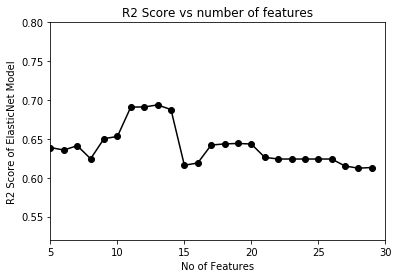

In [0]:
plt.scatter(np.array(nn_list),  np.array(r2_list), color='black')
plt.plot(np.array(nn_list),  np.array(r2_list), color='black')
plt.title('R2 Score vs number of features')
plt.ylim(0.52,0.8)
plt.xlim(5,30)
plt.xlabel('No of Features')
plt.ylabel('R2 Score of ElasticNet Model')
plt.show()  

In [0]:
#Optimum number of features
opt_no = nn_list[np.argmax(r2_list)]
#selector = SelectKBest(mutual_info_regression, k=opt_no)
#df_new = selector.fit_transform(df_norm, y)
#selected_features_opt = df_norm.columns.values[selector.get_support()]
#scores = selector.scores_[selector.get_support()]
selected_features_opt = features_list[opt_no-5]
print(opt_no)
print(np.max(r2_list))
print(selected_features_opt)

13
0.6936963256469325
['Dissolved Chloride (Cl)' 'Dissolved Uranium (U)'
 'Indeno(1_2_3-cd)pyrene' 'Oil and grease' 'Total Manganese (Mn)'
 'Total Suspended Solids' 'Total Uranium (U)' 'Xylenes (Total)'
 'WW_MILLAPI_OG' 'WW_PONDA_OUT_COD' 'P32_32G40_COD' 'P32_32G40_OG'
 'Mean Temp (Â°C)']

In [0]:
"""#Optimum number of features
opt_no = nn_list[np.argmax(r2_list)]
#selector = SelectKBest(mutual_info_regression, k=opt_no)
#df_new = selector.fit_transform(df_norm, y)
#selected_features_opt = df_norm.columns.values[selector.get_support()]
#scores = selector.scores_[selector.get_support()]
selected_features_opt = features_list[opt_no-5]
print(opt_no)
print(selected_features_opt)"""

Out[92]: '#Optimum number of features\nopt_no = nn_list[np.argmax(r2_list)]\n#selector = SelectKBest(mutual_info_regression, k=opt_no)\n#df_new = selector.fit_transform(df_norm, y)\n#selected_features_opt = df_norm.columns.values[selector.get_support()]\n#scores = selector.scores_[selector.get_support()]\nselected_features_opt = features_list[opt_no-5]\nprint(opt_no)\nprint(selected_features_opt)'

In [0]:
X_selected = df[selected_features_opt]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.20, random_state=42)  
# Scale dataset
scaler = preprocessing.StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)
y_train_scale = y_train 
y_test_scale = y_test

In [0]:
alpha = [1e-7, 1e-6, 5e-6, 0.00001, .0005, .01, .04, .05, 0.09, 0.1, .25, .5, 1]
l1_ratio = [.05, 0.1, .12, 0.2, .25, .3, .4, 0.5, .6, .8, .9]
r2 = -np.inf
for a in alpha:
  for l in l1_ratio:
    regr = ElasticNet(alpha=a, l1_ratio=l, random_state=42)
    regr.fit(X_train_scale, y_train_scale)
    y_pred = regr.predict(X_test_scale)
    if r2_score(y_test_scale, y_pred) > r2:
        a_best = a
        l_best = l
        r2 = r2_score(y_test_scale, y_pred)
regr = ElasticNet(alpha=a_best, l1_ratio=l_best, random_state=42)
regr.fit(X_train_scale, y_train_scale)
y_pred = regr.predict(X_test_scale)
r2 = r2_score(y_test_scale, y_pred)
print(a_best, l_best)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test_scale, y_pred))
print('Variance score: %.2f' % r2_score(y_test_scale, y_pred))

1e-07 0.05
Mean squared error: 0.04
Variance score: 0.69

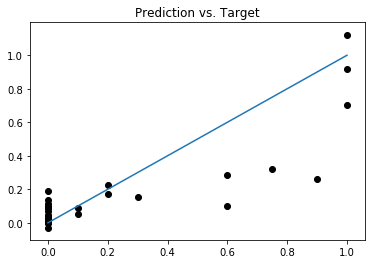

In [0]:
plt.scatter(y_test_scale,  y_pred, color='black')
sns.lineplot([0, 1],[0, 1])
plt.title('Prediction vs. Target')
plt.show()

In [0]:
X_scale = scaler.transform(X_selected)
#y_pred2 = regr.predict(X_scale)

--------------------------------------------------------------------------- 
 ValueError Traceback (most recent call last)
 <command-3261190969488830> in <module> 
 ----> 1 X_scale = scaler . transform ( X_selected ) 
 2 y_pred2 = regr . predict ( X_scale ) 

 /databricks/python/lib/python3.7/site-packages/sklearn/preprocessing/data.py in transform (self, X, y, copy) 
 781 else : 
 782 if self . with_mean : 
 --> 783 X -= self . mean_
 784 if self . with_std : 
 785 X /= self . scale_

 ValueError : operands could not be broadcast together with shapes (163,13) (21,) (163,13)

In [0]:
y_pred2 = regr.predict(X_scale)

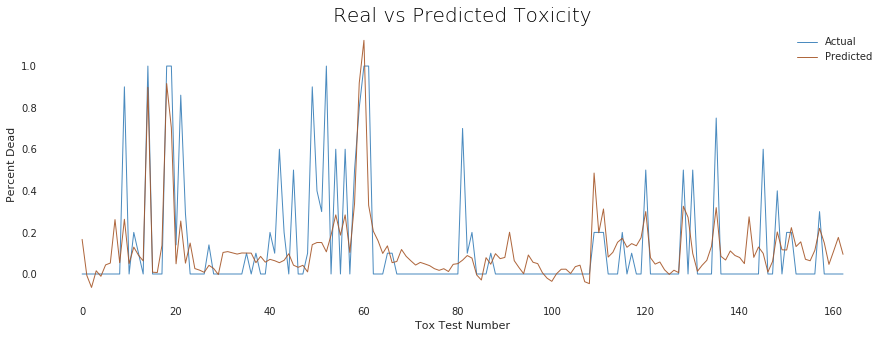

In [0]:
fig = plt.figure()
plt.style.use('seaborn')
palette = plt.get_cmap('Set1')

plt.plot(y, marker='', color=palette(1), linewidth=1, alpha=0.9, label='Actual')
plt.plot(y_pred2, marker='', color=palette(6), linewidth=1, alpha=0.9, label='Predicted')

plt.title('Real vs Predicted Toxicity', loc='center', fontsize=20, fontweight=5, color='black')
plt.ylabel('Percent Dead')
plt.xlabel('Tox Test Number')
axes = plt.gca()
plt.legend()
fig.set_size_inches(w=15,h=5)
plt.close()

display(fig)